In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
# Create a sample graph (you can extend this to more realistic data later)
G = nx.Graph()

# Add nodes (for simplicity, we use numbers as node IDs)
nodes = range(1, 10)
G.add_nodes_from(nodes)

# Define edges and initial weights (representing base travel time in minutes)
edges = [
    (1, 2, 5), (1, 3, 10), (2, 3, 3),
    (2, 4, 7), (3, 5, 2), (4, 5, 3),
    (4, 6, 8), (5, 7, 5), (6, 7, 2),
    (7, 8, 4), (8, 9, 6), (5, 9, 10)
]

# Add edges to the graph with weights
for u, v, w in edges:
    G.add_edge(u, v, weight=w)

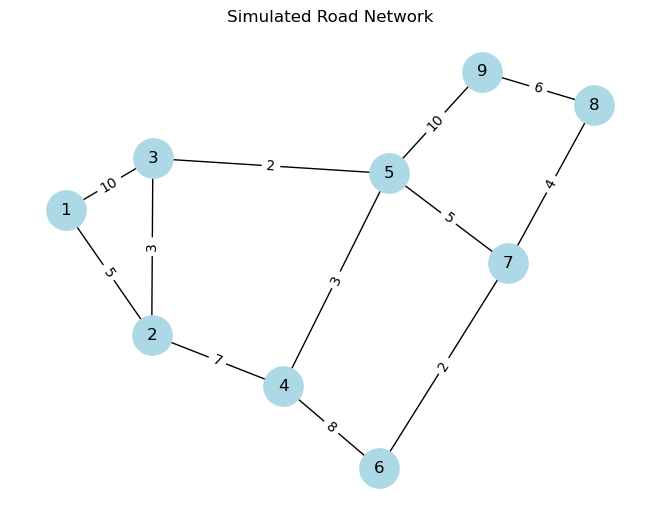

In [6]:
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=800)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Simulated Road Network")
plt.show()

In [8]:
# Example: Find shortest path from node 1 (ambulance location) to node 9 (hospital)
start_node = 1
destination_node = 9
shortest_path = nx.dijkstra_path(G, start_node, destination_node, weight='weight')
shortest_time = nx.dijkstra_path_length(G, start_node, destination_node, weight='weight')

print("NetworkX Dijkstra’s Algorithm:")
print(f"Shortest path from {start_node} to {destination_node}: {shortest_path}")
print(f"Total travel time: {shortest_time} minutes")

NetworkX Dijkstra’s Algorithm:
Shortest path from 1 to 9: [1, 2, 3, 5, 9]
Total travel time: 20 minutes


In [10]:
def dijkstra(graph, start, goal):
    # Initialize distances with infinity and 0 for the start node
    distances = {node: float('inf') for node in graph.nodes}
    distances[start] = 0
    # Dictionary to keep track of the optimal path
    previous_nodes = {node: None for node in graph.nodes}
    # Create a set of unvisited nodes
    unvisited = set(graph.nodes)
    
    while unvisited:
        # Select the unvisited node with the smallest distance
        current_node = min(unvisited, key=lambda node: distances[node])
        if current_node == goal:
            break
        unvisited.remove(current_node)
        
        for neighbor in graph.neighbors(current_node):
            edge_weight = graph[current_node][neighbor]['weight']
            new_distance = distances[current_node] + edge_weight
            if new_distance < distances[neighbor]:
                distances[neighbor] = new_distance
                previous_nodes[neighbor] = current_node
    
    # Reconstruct the path
    path = []
    current = goal
    while current is not None:
        path.insert(0, current)
        current = previous_nodes[current]
    return path, distances[goal]

custom_path, custom_time = dijkstra(G, start_node, destination_node)
print("\nCustom Dijkstra’s Implementation:")
print(f"Shortest path from {start_node} to {destination_node}: {custom_path}")
print(f"Total travel time: {custom_time} minutes")


Custom Dijkstra’s Implementation:
Shortest path from 1 to 9: [1, 2, 3, 5, 9]
Total travel time: 20 minutes


In [12]:
def update_traffic_conditions(graph):
    # Simulate traffic: for each edge, multiply the base weight by a factor between 0.8 and 1.5
    for u, v, data in graph.edges(data=True):
        base_weight = next((w for x, y, w in edges if {x, y} == {u, v}), data['weight'])
        traffic_factor = random.uniform(0.8, 1.5)
        graph[u][v]['weight'] = round(base_weight * traffic_factor, 1)

# Simulate traffic updates
update_traffic_conditions(G)

# Print updated edge weights
print("Updated edge weights after simulating traffic:")
for u, v, data in G.edges(data=True):
    print(f"Edge {u}-{v}: {data['weight']} minutes")

Updated edge weights after simulating traffic:
Edge 1-2: 7.1 minutes
Edge 1-3: 8.2 minutes
Edge 2-3: 3.7 minutes
Edge 2-4: 8.3 minutes
Edge 3-5: 2.3 minutes
Edge 4-5: 3.3 minutes
Edge 4-6: 11.9 minutes
Edge 5-7: 6.9 minutes
Edge 5-9: 11.8 minutes
Edge 6-7: 2.2 minutes
Edge 7-8: 3.5 minutes
Edge 8-9: 9.0 minutes


In [14]:
# Simulate historical data for hospitals
# For simplicity, assume we have 3 hospitals with features: current load and time of day (simplified)
np.random.seed(42)  # For reproducibility
n_samples = 100

data = {
    'hospital_id': np.random.choice([101, 102, 103], n_samples),
    'current_load': np.random.randint(0, 100, n_samples),  # number of patients currently in ICU
    'time_of_day': np.random.randint(0, 24, n_samples),      # hour of day
}
df = pd.DataFrame(data)

# Define a simple rule: if current load is below a threshold, ICU is likely available.
# Here, we create a target variable: available = 1 if current_load < 50, else 0
df['icu_available'] = (df['current_load'] < 50).astype(int)

df.head()

,hospital_id,current_load,time_of_day,icu_available
0,103,7,16,1
1,101,87,16,0
2,103,62,19,0
3,103,10,11,1
4,101,80,6,0


In [16]:
# Features: current_load and time_of_day. You can add more features if available.
X = df[['current_load', 'time_of_day']]
y = df['icu_available']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"ML Model Accuracy on simulated data: {accuracy * 100:.2f}%")

ML Model Accuracy on simulated data: 100.00%


In [18]:
# Simulated current data for hospitals (hospital_id, current_load, time_of_day)
current_hospitals = pd.DataFrame({
    'hospital_id': [101, 102, 103],
    'current_load': [45, 70, 30],
    'time_of_day': [14, 14, 14]
})

# Predict ICU availability
current_hospitals['predicted_availability'] = model.predict(current_hospitals[['current_load', 'time_of_day']])
print("\nCurrent Hospital ICU Predictions:")
print(current_hospitals)


Current Hospital ICU Predictions:
   hospital_id  current_load  time_of_day  predicted_availability
0          101            45           14                       1
1          102            70           14                       0
2          103            30           14                       1


In [20]:
# For demonstration, we manually assign hospitals to nodes in the graph:
hospital_locations = {
    101: 8,  # Hospital 101 is at node 8
    102: 4,  # Hospital 102 is at node 4
    103: 9   # Hospital 103 is at node 9
}

In [22]:
def select_optimal_hospital(ambulance_location, hospital_predictions, hospital_locations, graph):
    available_hospitals = hospital_predictions[hospital_predictions['predicted_availability'] == 1]
    best_route = None
    best_time = float('inf')
    best_hospital_id = None

    for _, row in available_hospitals.iterrows():
        hosp_id = row['hospital_id']
        node = hospital_locations.get(hosp_id)
        if node is None:
            continue  # skip if hospital location is not mapped
        try:
            path = nx.dijkstra_path(graph, ambulance_location, node, weight='weight')
            travel_time = nx.dijkstra_path_length(graph, ambulance_location, node, weight='weight')
            print(f"Hospital {hosp_id} (Node {node}): Route {path} with travel time {travel_time} minutes")
            if travel_time < best_time:
                best_time = travel_time
                best_route = path
                best_hospital_id = hosp_id
        except nx.NetworkXNoPath:
            print(f"No path available to hospital {hosp_id} at node {node}")

    return best_hospital_id, best_route, best_time

ambulance_location = 1  # starting node for the ambulance
best_hospital, best_route, best_time = select_optimal_hospital(
    ambulance_location,
    current_hospitals,
    hospital_locations,
    G
)

print("\nOptimal Hospital Selection:")
if best_hospital:
    print(f"Select Hospital {best_hospital} with route {best_route} and travel time {best_time} minutes")
else:
    print("No hospital with available ICU beds found.")

Hospital 101 (Node 8): Route [1, 3, 5, 7, 8] with travel time 20.9 minutes
Hospital 103 (Node 9): Route [1, 3, 5, 9] with travel time 22.3 minutes

Optimal Hospital Selection:
Select Hospital 101 with route [1, 3, 5, 7, 8] and travel time 20.9 minutes


In [24]:
!pip install folium

  Using cached folium-0.19.4-py2.py3-none-any.whl.metadata (3.8 kB)
  Using cached branca-0.8.1-py3-none-any.whl.metadata (1.5 kB)
Using cached folium-0.19.4-py2.py3-none-any.whl (110 kB)
Using cached branca-0.8.1-py3-none-any.whl (26 kB)


In [26]:
import folium

In [28]:
# Example coordinates near a central area (e.g., part of NYC)
node_coords = {
    1: (40.7128, -74.0060),
    2: (40.7138, -74.0050),
    3: (40.7148, -74.0040),
    4: (40.7158, -74.0030),
    5: (40.7168, -74.0020),
    6: (40.7178, -74.0010),
    7: (40.7188, -74.0000),
    8: (40.7198, -73.9990),
    9: (40.7208, -73.9980)
}

In [30]:
# Calculate center of map
center_lat = sum(lat for lat, lon in node_coords.values()) / len(node_coords)
center_lon = sum(lon for lat, lon in node_coords.values()) / len(node_coords)

# Create a Folium map centered at the calculated point
m = folium.Map(location=[center_lat, center_lon], zoom_start=15)

In [32]:
for node, coord in node_coords.items():
    folium.CircleMarker(
        location=coord,
        radius=4,
        color='blue',
        fill=True,
        fill_color='blue',
        popup=f"Node {node}"
    ).add_to(m)

In [34]:
# Assuming 'G' is your NetworkX graph from the previous code
for u, v, data in G.edges(data=True):
    coords = [node_coords[u], node_coords[v]]
    folium.PolyLine(
        locations=coords,
        weight=2,
        color='gray',
        opacity=0.7,
        popup=f"Edge {u}-{v}: {data['weight']} min"
    ).add_to(m)

In [36]:
if best_route:
    # Create a list of coordinates for the optimal route
    optimal_coords = [node_coords[node] for node in best_route]
    folium.PolyLine(
        locations=optimal_coords,
        weight=5,
        color='red',
        opacity=0.8,
        popup="Optimal Route"
    ).add_to(m)

In [38]:
# For example, hospital_locations = {101: 8, 102: 4, 103: 9}
for hosp_id, node in hospital_locations.items():
    if node in node_coords:
        folium.Marker(
            location=node_coords[node],
            icon=folium.Icon(color='green', icon='plus-sign', prefix='glyphicon'),
            popup=f"Hospital {hosp_id}"
        ).add_to(m)

In [40]:
m

In [42]:
!pip install osmnx folium networkx shapely

  Using cached geopandas-1.0.1-py3-none-any.whl.metadata (2.2 kB)
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.4 MB 645.7 kB/s eta 0:00:02
   -------------- ------------------------- 0.5/1.4 MB 645.7 kB/s eta 0:00:02
   -------------- ------------------------- 0.5/1.4 MB 645.7 kB/s eta 0:00:02
   --------------------- ------------------ 0.8/1.4 MB 508.5 kB/s eta 0:00:02
   --------------------- ------------------ 0.8/1.4 MB 508.5 kB/s eta 0:00:02
   --------------------- ------------------ 0.8/1.4 MB 508.5 kB/s eta 0:00:02
   --------------------- ------------------ 0.8/1.4 MB 508.5 kB/s eta 0:00:02
   --------------------- ------------------ 0.8/1.4 MB 508.5 kB/s eta 0:00:02
   --------------------- ---------

In [46]:
import osmnx as ox
import networkx as nx
import folium
import pandas as pd
from shapely.geometry import Point

# Configure OSMnx logging (optional)
ox.settings.log_console = True
ox.settings.use_cache = True

# Define the area of interest
place_name = "Manhattan, New York City, New York, USA"

# Download the road network for drivable roads (already simplified by default)
print("Downloading road network for", place_name)
G = ox.graph_from_place(place_name, network_type='drive')

# No need to simplify again; G is ready to use!

In [48]:
import osmnx as ox
import networkx as nx
import folium
import pandas as pd
from shapely.geometry import Point

# Configure OSMnx logging (optional)
ox.settings.log_console = True
ox.settings.use_cache = True

# Define the area of interest
place_name = "Manhattan, New York City, New York, USA"

# Download the road network for drivable roads without automatic simplification
print("Downloading road network for", place_name)
G = ox.graph_from_place(place_name, network_type='drive', simplify=False)

# Now simplify the graph manually
G = ox.simplify_graph(G)

In [50]:
# Define ambulance starting coordinate (latitude, longitude)
ambulance_coord = (40.7580, -73.9855)  # Times Square

# Find the nearest node in the network to the ambulance coordinate
ambulance_node = ox.distance.nearest_nodes(G, X=ambulance_coord[1], Y=ambulance_coord[0])
print("Ambulance is located at network node:", ambulance_node)

Ambulance is located at network node: 42428297


In [56]:
pip install --upgrade osmnx

Note: you may need to restart the kernel to use updated packages.


In [63]:
import requests

API_KEY = "YOUR_GOOGLE_MAPS_API_KEY"
origin = "12.9715987,77.5945627"  # Example: Bengaluru coordinates
destination = "12.935242,77.624944"  # Example: Hospital location

url = f"https://maps.googleapis.com/maps/api/directions/json?origin={origin}&destination={destination}&key={API_KEY}&traffic_model=best_guess&departure_time=now"

response = requests.get(url)
data = response.json()

# Extract duration
if "routes" in data and len(data["routes"]) > 0:
    duration = data["routes"][0]["legs"][0]["duration"]["text"]
    print(f"Estimated Time to Reach: {duration}")
else:
    print("No route found!")

No route found!


In [65]:
import heapq

def dijkstra(graph, start, end):
    queue = [(0, start)]
    distances = {node: float("inf") for node in graph}
    distances[start] = 0
    path = {}

    while queue:
        current_distance, current_node = heapq.heappop(queue)

        if current_distance > distances[current_node]:
            continue

        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight

            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(queue, (distance, neighbor))
                path[neighbor] = current_node

    return distances, path

# Example Graph with Roads and Traffic Weights
graph = {
    "A": {"B": 10, "C": 20},
    "B": {"D": 15, "E": 50},
    "C": {"E": 30},
    "D": {"E": 30, "F": 10},
    "E": {"F": 5},
    "F": {}
}

start, end = "A", "F"
distances, path = dijkstra(graph, start, end)
print(f"Shortest Distance: {distances[end]}")

Shortest Distance: 35


In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv("hospital_bed_data.csv")

# If ICU data is available, compute the free percentage
if 'ICU Beds' in df.columns and 'Occupied ICU Beds' in df.columns:
    df['Predicted ICU Free (%)'] = ((df['ICU Beds'] - df['Occupied ICU Beds']) / df['ICU Beds']) * 100
else:
    print("Columns 'ICU Beds' and 'Occupied ICU Beds' are required to calculate 'Predicted ICU Free (%)'.")
    # Alternatively, you could use another target column
    df['Predicted ICU Free (%)'] = df['Available Beds']  # as an example

# Features & Target
X = df[['Total Beds', 'Occupied Beds', 'New Admissions']]
y = df['Predicted ICU Free (%)']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train ML Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict & Evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Predict ICU Availability for new data
new_data = np.array([[100, 90, 5]])  # Example: 100 beds, 90 occupied, 5 new admissions
predicted_icu_free = model.predict(new_data)[0]
print(f"Predicted ICU Free: {predicted_icu_free:.2f}%")

Columns 'ICU Beds' and 'Occupied ICU Beds' are required to calculate 'Predicted ICU Free (%)'.
Mean Absolute Error: 1.5347723092418165e-14
Predicted ICU Free: 10.00%


In [69]:
# Example hospital data
hospitals = [
    {"name": "Apollo Hospital", "icu_free": 20, "distance": 5},
    {"name": "Manipal Hospital", "icu_free": 5, "distance": 3},
    {"name": "Fortis Hospital", "icu_free": 15, "distance": 8}
]

# Select hospital with highest ICU availability & shortest distance
best_hospital = sorted(hospitals, key=lambda x: (-x["icu_free"], x["distance"]))[0]
print(f"🚑 Directing ambulance to: {best_hospital['name']}")

🚑 Directing ambulance to: Apollo Hospital


In [83]:
import folium

# Create a map centered at Bengaluru
m = folium.Map(location=[12.9716, 77.5946], zoom_start=12)

# Define ambulance and hospital coordinates
ambulance_location = [12.9716, 77.5946]  # Ambulance location
hospital_location = [12.9352, 77.6249]    # Hospital location

# Mark the ambulance and hospital locations
folium.Marker(
    ambulance_location, 
    popup="Ambulance Location", 
    icon=folium.Icon(color="blue")
).add_to(m)
folium.Marker(
    hospital_location, 
    popup="Hospital", 
    icon=folium.Icon(color="red")
).add_to(m)

# Define the best (direct) route in green
route_best = [ambulance_location, hospital_location]

# Define four alternate routes with intermediate points in black
route_alt1 = [ambulance_location, [12.9650, 77.6000], hospital_location]
route_alt2 = [ambulance_location, [12.9700, 77.6100], hospital_location]
route_alt3 = [ambulance_location, [12.9600, 77.5800], hospital_location]
route_alt4 = [ambulance_location, [12.9750, 77.6000], hospital_location]

# Draw the best route (green solid line)
folium.PolyLine(
    route_best, 
    color="green", 
    weight=5, 
    opacity=1.0, 
    tooltip="Best Route"
).add_to(m)

# Draw the four alternate routes (black dashed lines)
folium.PolyLine(
    route_alt1, 
    color="black", 
    weight=3, 
    opacity=0.7, 
    dash_array="5, 5", 
    tooltip="Alternate Route 1"
).add_to(m)
folium.PolyLine(
    route_alt2, 
    color="black", 
    weight=3, 
    opacity=0.7, 
    dash_array="5, 5", 
    tooltip="Alternate Route 2"
).add_to(m)
folium.PolyLine(
    route_alt3, 
    color="black", 
    weight=3, 
    opacity=0.7, 
    dash_array="5, 5", 
    tooltip="Alternate Route 3"
).add_to(m)
folium.PolyLine(
    route_alt4, 
    color="black", 
    weight=3, 
    opacity=0.7, 
    dash_array="5, 5", 
    tooltip="Alternate Route 4"
).add_to(m)

# Display the map
m

In [85]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("hospital_bed_data.csv")

# Check if the target column exists; if not, compute it based on available columns.
# If your dataset contains 'ICU Beds' and 'Occupied ICU Beds', calculate ICU Free percentage.
if 'Predicted ICU Free (%)' not in df.columns:
    if 'ICU Beds' in df.columns and 'Occupied ICU Beds' in df.columns:
        df['Predicted ICU Free (%)'] = ((df['ICU Beds'] - df['Occupied ICU Beds']) / df['ICU Beds']) * 100
    else:
        # Fallback: Use 'Available Beds' as a proxy if ICU-specific data is not available.
        df['Predicted ICU Free (%)'] = df['Available Beds']

# Define features and target variable
X = df[['Total Beds', 'Occupied Beds', 'New Admissions']]
y = df['Predicted ICU Free (%)']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Perform 5-fold cross-validation for additional validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

print("Cross-validated R-squared scores:", cv_r2_scores)
print(f"Mean Cross-validated R²: {np.mean(cv_r2_scores):.2f}")

Mean Absolute Error (MAE): 0.00
Root Mean Squared Error (RMSE): 0.00
R-squared (R²): 1.00
Cross-validated R-squared scores: [1. 1. 1. 1. 1.]
Mean Cross-validated R²: 1.00


In [87]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("hospital_bed_data.csv")

# Check & Create 'Predicted ICU Free (%)' if missing
if 'Predicted ICU Free (%)' not in df.columns:
    if 'ICU Beds' in df.columns and 'Occupied ICU Beds' in df.columns:
        df['Predicted ICU Free (%)'] = ((df['ICU Beds'] - df['Occupied ICU Beds']) / df['ICU Beds']) * 100
    else:
        df['Predicted ICU Free (%)'] = df['Available Beds']  # Fallback

# Features and Target
X = df[['Total Beds', 'Occupied Beds', 'New Admissions']]
y = df['Predicted ICU Free (%)']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Train XGBoost Model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Make Predictions
rf_pred = rf_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

# Evaluate Performance
def evaluate_model(model_name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"\n📌 {model_name} Performance:")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.2f}")

evaluate_model("Random Forest", y_test, rf_pred)
evaluate_model("XGBoost", y_test, xgb_pred)

# Predict ICU Availability for new data (Example)
new_data = np.array([[100, 90, 5]])  # 100 beds, 90 occupied, 5 new admissions
rf_icu_pred = rf_model.predict(new_data)[0]
xgb_icu_pred = xgb_model.predict(new_data)[0]

print(f"\n🔹 Random Forest Predicted ICU Free: {rf_icu_pred:.2f}%")
print(f"🔹 XGBoost Predicted ICU Free: {xgb_icu_pred:.2f}%")



📌 Random Forest Performance:
MAE: 1.47
RMSE: 2.12
R² Score: 0.99

📌 XGBoost Performance:
MAE: 1.45
RMSE: 1.93
R² Score: 0.99

🔹 Random Forest Predicted ICU Free: 10.85%
🔹 XGBoost Predicted ICU Free: 13.04%


In [89]:
import requests

# Google Maps API Key (Replace with your actual key)
API_KEY = "YOUR_GOOGLE_MAPS_API_KEY"

# Function to get real-time travel time
def get_real_time_traffic(ambulance_location, hospital_location):
    origin = f"{ambulance_location[0]},{ambulance_location[1]}"
    destination = f"{hospital_location[0]},{hospital_location[1]}"
    url = f"https://maps.googleapis.com/maps/api/directions/json?origin={origin}&destination={destination}&key={API_KEY}&traffic_model=best_guess&departure_time=now"
    
    response = requests.get(url).json()
    
    if "routes" in response and len(response["routes"]) > 0:
        duration = response["routes"][0]["legs"][0]["duration"]["text"]
        return duration
    return "No data"

# Example: Get travel time from ambulance to hospital
ambulance_location = [12.9716, 77.5946]  # MG Road, Bengaluru
hospital_location = [12.9352, 77.6249]  # Manipal Hospital
travel_time = get_real_time_traffic(ambulance_location, hospital_location)

print(f"🚑 Estimated Travel Time (Real-Time Traffic): {travel_time}")

🚑 Estimated Travel Time (Real-Time Traffic): No data


In [93]:
# Sample hospital ICU availability data (manually defined)
hospital_icu_data = {
    "Manipal Hospital": 5,
    "Apollo Hospital": 20,
    "Fortis Hospital": 15
}

# Function to get ICU availability without API calls
def get_hospital_icu_availability(hospital_name):
    return hospital_icu_data.get(hospital_name, "Data unavailable")

# Example Usage
hospital_name = "Manipal Hospital"
icu_beds_available = get_hospital_icu_availability(hospital_name)

print(f"🏥 {hospital_name} ICU Beds Available: {icu_beds_available}")


🏥 Manipal Hospital ICU Beds Available: 5
